In [1]:
import sympy as sy

# Compton Scatter

The differential cross section for a photon scatter event is

$$\frac{d\sigma}{d\theta} =  \frac{1}
                            {1+\frac{E}{0.511} (1-cos(\theta)) }$$






In [12]:
E, theta = sy.symbols(r'E \theta')

dcs = 1/(1+E/0.511 * (1-sy.cos(theta)))
dcs

1/(1.95694716242661*E*(1 - cos(\theta)) + 1)

For now, I want to use the inverse transform sampling method on this dcs. I am aware that there is a better model. If you're reviewing this, it's probably time to go and check it out.

To apply an inverse transform method I first need to normalize the DCS.

> sy.integrate(dcs, (theta, 0, sy.pi))

However this doesn't compute the integral for some reasone, it just gets stuck.

So, i'm going to do a taylor expansion of the dcs and work with that.

In [13]:
dcs_expansion = 0
for n in range(15):
    dcs_expansion += dcs.taylor_term(n, theta)

1/(1.95694716242661*E*(1 - cos(\theta)) + 1)

In [14]:
dcs_expansion

4.39288513667217e-11*E*\theta**14*(-19547619723.8837*E**6 - 9988833678.90458*E**5 - 1701431336.64008*E**4 - 110403988.955312*E**3 - 2291917.80821918*E**2 - 8190.0*E - 0.511) + 7.99505094874334e-9*E*\theta**12*(109767403.064886*E**5 + 46742619.1384638*E**4 + 6050987.8562046*E**3 + 247984.344422701*E**2 + 2046.0*E + 0.511) + 1.05534672523412e-6*E*\theta**10*(-849865.802517523*E**4 - 289520.950057636*E**3 - 25890.4109589041*E**2 - 510.0*E - 0.511) + 9.49812052710709e-5*E*\theta**8*(9650.69833525454*E**3 + 2465.75342465753*E**2 + 126.0*E + 0.511) + 0.00531894749517997*E*\theta**6*(-176.125244618395*E**2 - 30.0*E - 0.511) + 0.159568424855399*E*\theta**4*(6.0*E + 0.511) - 0.978473581213307*E*\theta**2 + 1

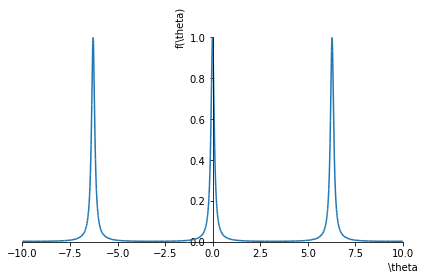

In [16]:
sy.plot(dcs.subs(E, 100))

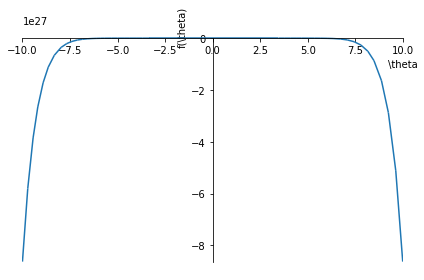

In [18]:
sy.plot(dcs_expansion.subs(E, 100))

Well that is a shame!

In [ ]:
sy.integrate(dcs_expansion, (theta, 0, pi))

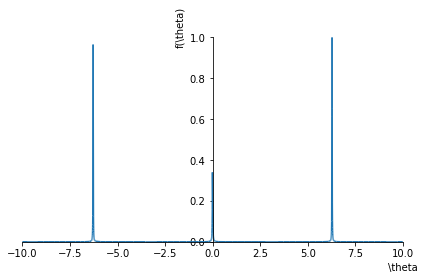

In [21]:
sy.plot(dcs.subs(E, 22000))

Looks like it never goes above one. Is this normalized?

In [23]:
sy.integrate(dcs.subs(E, 100), (theta, 0, sy.pi))

-0.00508402065445573*Integral(1/(0.994915979345544*cos(\theta) - 1.0), (\theta, 0, pi))

ugh, gonna use quad

In [32]:
from scipy.integrate import quad
from numpy import cos, pi

dcs100 = lambda x: 1/(1+100/0.511 * (1-cos(x)))
print("int de -pi/2 a pi/2 ---> {}".format(quad(dcs100, -pi/2, pi/2)))
print("int de 0 a pi ---> {}".format(quad(dcs100, 0, pi)))
print("int de -pi a 0 ---> {}".format(quad(dcs100, -pi, 0)))

int de -pi/2 a pi/2 ---> (0.307005955605667, 4.767024305861356e-12)
int de 0 a pi ---> (0.15859563177196132, 2.3835670884726873e-12)
int de -pi a 0 ---> (0.15859563177196132, 2.3835670884726873e-12)


Sure doesn't look like it.

Either way, doesn't look like a good idea to use the rejection method for this. It looks like the phase function gets very pointy at high energies.

rayleihg:
(3/4)*(1 + cos(2*theta))
